1.Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2.Figure out if any preprocessing such as scaling would help here
3.Draw elbow plot and from that figure out optimal value of k

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [32]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [34]:
df=df.rename(columns={'petal length (cm)':'length','petal width (cm)':'width'})
df.head()

,length,width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0.5, 1.0, 'petal')

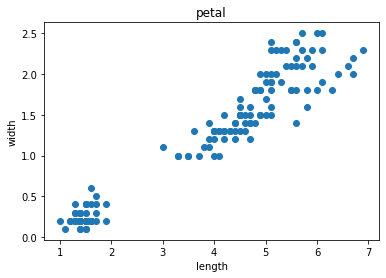

In [35]:
#plot the distributions
plt.scatter(df.length, df.width)
plt.xlabel('length')
plt.ylabel('width')
plt.title('petal')

In [36]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['length','width']])
y_predicted


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

predicts the clusters of the flowers

In [37]:
df['cluster']=y_predicted
df.head()

,length,width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [38]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

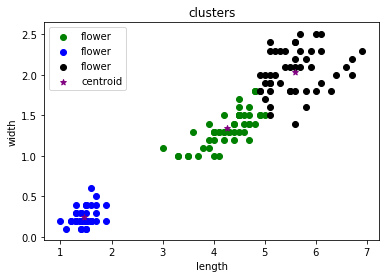

In [40]:
#plot the centers
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.length,df1.width, color='green',label='flower')
plt.scatter(df2.length, df2.width, color='blue',label='flower')
plt.scatter(df3.length, df3.width, color='black', label='flower')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*',label='centroid')
plt.xlabel('length')
plt.ylabel('width')
plt.title('clusters')
plt.legend()

### Preprocessing using minmax scaler

In [41]:
scaler=MinMaxScaler()
scaler.fit(df[['length']])
df['length']=scaler.transform(df[['length']])
scaler.fit(df[['width']])
df['width']=scaler.transform(df[['width']])

In [42]:
df.head()

,length,width,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


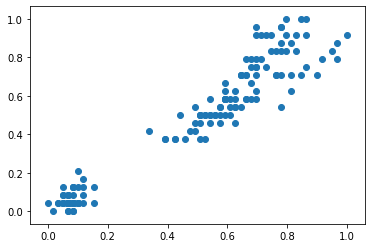

In [43]:
plt.scatter(df.length,df.width)


In [45]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['length','width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
df['cluster']=y_predicted
df.head()

,length,width,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [47]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

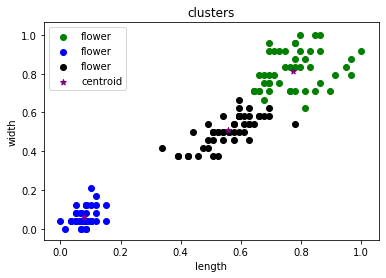

In [48]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.length,df1.width, color='green',label='flower')
plt.scatter(df2.length, df2.width, color='blue',label='flower')
plt.scatter(df3.length, df3.width, color='black',label='flower')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*',label='centroid')
plt.xlabel('length')
plt.ylabel('width')
plt.title('clusters')
plt.legend()

### Elbow pivot

In [29]:
#plots the fits in the range defined and finds the cluster numbers in the different plotted clusters. appends the numbers to sse

sse=[]
krng=range(1,10)
for k in krng:
    km=KMeans(n_clusters=k)
    km.fit(df[['length','width']])
    sse.append(km.inertia_)

Text(0.5, 1.0, 'Elbow plot')

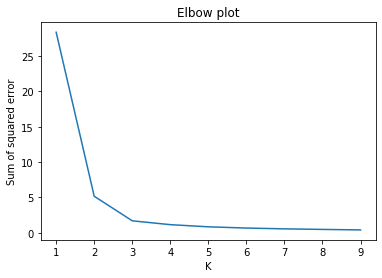

In [31]:
plt.plot(krng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow plot')

The optimal value for k=3

In [49]:
df.head()

,length,width,cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [50]:
df['target']=iris.target
df.head()

,length,width,cluster,target
0,0.067797,0.041667,1,0
1,0.067797,0.041667,1,0
2,0.050847,0.041667,1,0
3,0.084746,0.041667,1,0
4,0.067797,0.041667,1,0


In [51]:
df['flower name']=df.cluster.apply(lambda x: iris.target_names[x])
df.head()

,length,width,cluster,target,flower name
0,0.067797,0.041667,1,0,versicolor
1,0.067797,0.041667,1,0,versicolor
2,0.050847,0.041667,1,0,versicolor
3,0.084746,0.041667,1,0,versicolor
4,0.067797,0.041667,1,0,versicolor


In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
df['initial name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,length,width,cluster,target,flower name,initial name
0,0.067797,0.041667,1,0,versicolor,setosa
1,0.067797,0.041667,1,0,versicolor,setosa
2,0.050847,0.041667,1,0,versicolor,setosa
3,0.084746,0.041667,1,0,versicolor,setosa
4,0.067797,0.041667,1,0,versicolor,setosa


In [54]:
df[df.target==df.cluster]

,length,width,cluster,target,flower name,initial name
106,0.593220,0.666667,2,2,virginica,virginica
119,0.677966,0.583333,2,2,virginica,virginica
133,0.694915,0.583333,2,2,virginica,virginica
134,0.779661,0.541667,2,2,virginica,virginica


In [55]:
import seaborn as sns

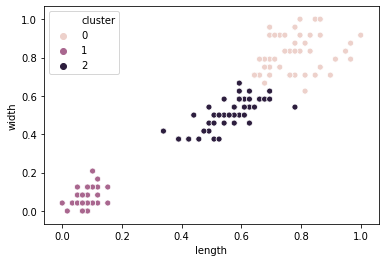

In [56]:
sns.scatterplot(df.length, df.width, hue=df.cluster)